In [1]:
%load_ext autoreload
%autoreload 2
import os
import glob
import datetime
import subprocess
print(datetime.datetime.now())

from pygentoolbox import IterativeFastqGzMappingWithHisat2
from pygentoolbox import SeqsPerFeatureAndFeatureTypeFixed
from pygentoolbox import CalculateRelativeBaseCoverageOfFeatureTypetRNA

# need pygentoolbox.Tools also
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

2020-03-09 12:21:22.756662


In [2]:
# define variables:
# cell 1
fileextension='.fastq.gz'
directory='/media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts'
cleanreads=True  # are .fastq.gz reads already clean? if True skip fastp
reference='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_Mac'
Gff3file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/ptetraurelia_mac_51_annotation_v2.0.gff3'

# cell 2
mappeddirectory = os.path.join(directory, 'hisat2')
# collect sorted sam files generated in the previous step:
samfileextension = '.sort.sam'

# cell 3
target_feature = 'tRNA'
numbins = 10
print(datetime.datetime.now())

2020-03-09 12:21:23.874210


In [3]:
from pygentoolbox import IterativeFastqGzMappingWithHisat2

#fileextension='.fastq.gz'
#directory='/media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-29_inserts'
#cleanreads=True  # are .fastq.gz reads already clean? if True skip fastp
#reference='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_Mac'

IterativeFastqGzMappingWithHisat2.main(fileextension, directory, cleanreads, reference)
print(datetime.datetime.now())

yep your reads must already be clean
Start unpacking trimmed.gz file:
/media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_15bp.fastq.gz
gzip -f -d -k /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_15bp.fastq.gz
Finished unpacking:
/media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_15bp.fastq

Starting fastqc
/media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/fastqc
Directory  /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/fastqc  already exists
/media/sf_LinuxShare/Programs/FastQC/fastqc -o /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/fastqc -f fastq fastq /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_15bp.fast

In [7]:
import os
import glob
import subprocess
from pygentoolbox import SeqsPerFeatureAndFeatureTypeFixed


#Gff3file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/ptetraurelia_mac_51_annotation_v2.0.gff3'
#samfilelist = ['180917_NB501850_A_L1-4_ADPF-29_AdapterTrimmed_R1_33bp.Pt_51_Mac.sort.sam']
#directory = '/media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-29_inserts/hisat2'
#mappeddirectory = os.path.join(directory, 'hisat2')

# collect sorted sam files generated in the previous step:
#samfileextension = '.sort.sam'
samfilelist = []
for file in os.listdir(mappeddirectory):
    if file.endswith(samfileextension):
        samfilelist.append(os.path.join(mappeddirectory, file))
        
# count number of reads per feature
# count number of reads per feature type (exon, mRNA, 5' UTR, etc.) and sort so counts are decreasing

#bamfilelist = ['180917_NB501850_A_L1-4_ADPF-29_AdapterTrimmed_R1_33bp.Pt_51_Mac.sort.bam']
# convert bam to sam
#samfilelist = []
#for bam in bamfilelist:
#    bampath = os.path.join(directory, bam)
#    cmd = 'samtools view -h %s' % (bampath)
#    with open(bampath[:-len('.bam')] + '.sam', 'w') as OUT:
#        ps = subprocess.Popen(cmd.split(), stdout=OUT)
#        ps.wait()
#    samfilelist.append(bampath[:-len('.bam')] + '.sam')


SeqsPerFeatureAndFeatureTypeFixed.main(Gff3file, samfilelist)
print(datetime.datetime.now())

Reading Gff3 file: /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ptetraurelia_mac_51_annotation_v2.0.gff3
Number of scaffolds: 539
Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_15bp.Pt_51_Mac.sort.sam
Number of scaffolds (in header): 697
Total number of lines in sam file (excluding header): 0
Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_16bp.Pt_51_Mac.sort.sam
Number of scaffolds (in header): 697
Total number of lines in sam file (excluding header): 0
Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_17bp.Pt_51_Mac.sort.sam
Number of scaffolds (in header): 697
Total number of lines in sam file (excluding header): 13301
Mapped reads, so calculating seqs per feature and feature type


Reading Gff3 file: /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ptetraurelia_mac_51_annotation_v2.0.gff3
Number of scaffolds: 539
Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_15bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_15bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 0
Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_16bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_16bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 0
Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_17bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1

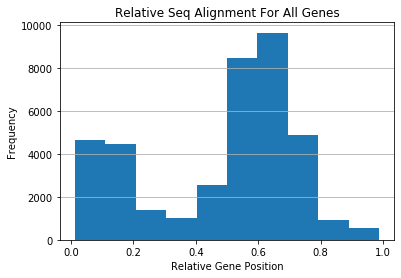

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_18bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_18bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 20772
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_18bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


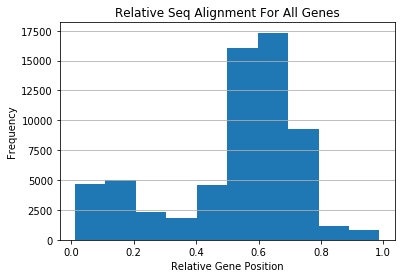

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_19bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_19bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 26963
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_19bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


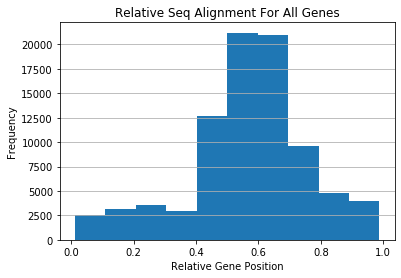

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_20bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_20bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 24848
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_20bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


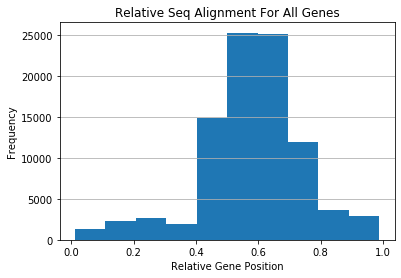

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_21bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_21bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 22699
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_21bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


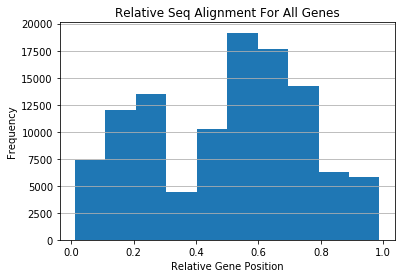

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_22bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_22bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 22440
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_22bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


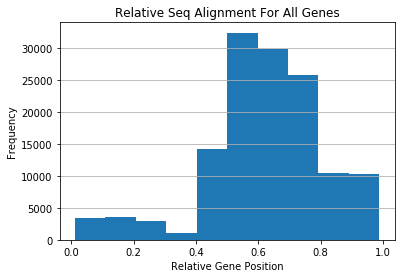

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_23bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_23bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 26039
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_23bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


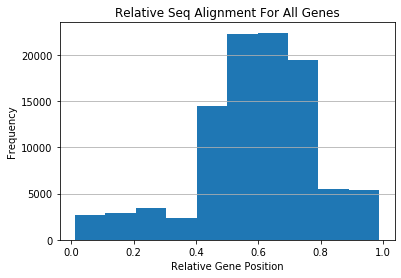

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_24bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_24bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 16930
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_24bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


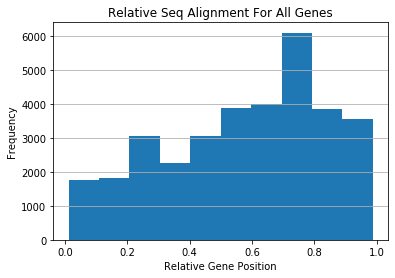

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_25bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_25bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 17548
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_25bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


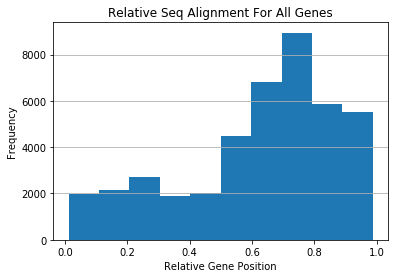

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_26bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_26bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 15166
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_26bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


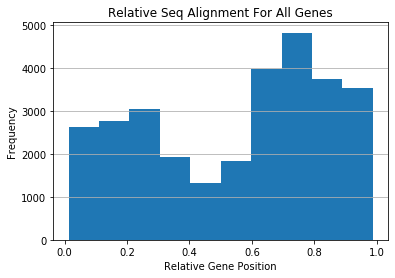

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_27bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_27bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 14884
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_27bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


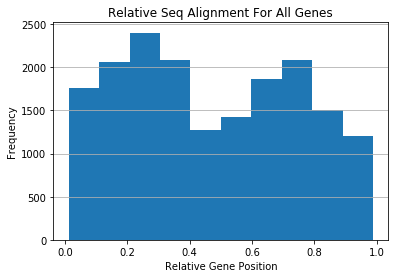

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_28bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_28bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 13869
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_28bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


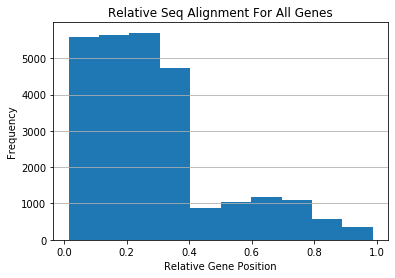

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_29bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_29bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 13845
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_29bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


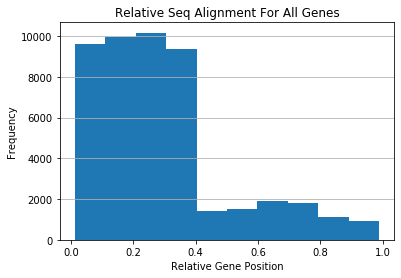

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_30bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_30bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 14070
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_30bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


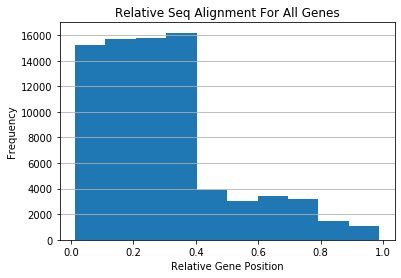

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_31bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_31bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 16940
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_31bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


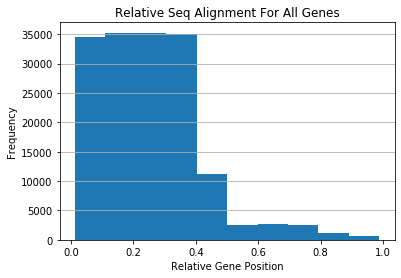

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_32bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_32bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 17676
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_32bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


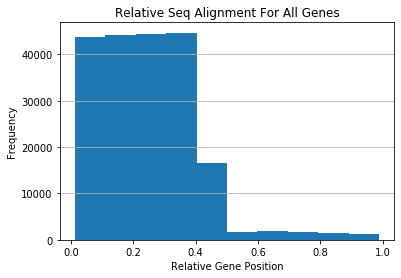

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_33bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_33bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 69963
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_33bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


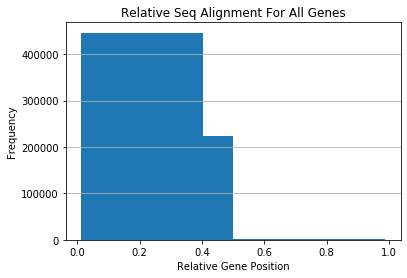

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_34bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_34bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 2260
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_34bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


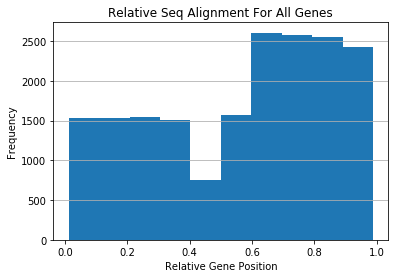

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_35bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_35bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 1104
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_35bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


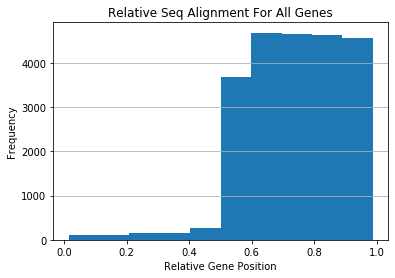

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_36bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_36bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 296
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_36bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


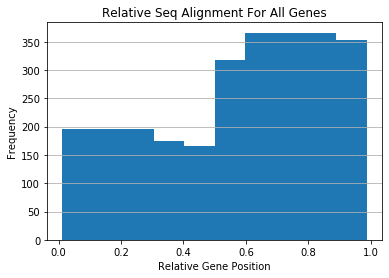

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_37bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_37bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 173
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_37bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


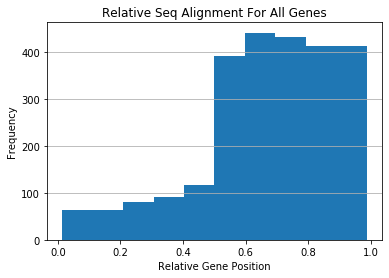

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_38bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_38bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 106
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_38bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


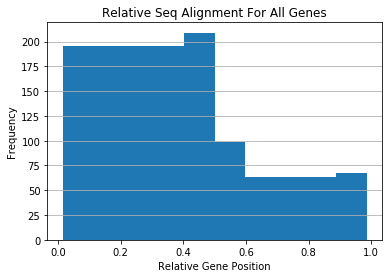

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_39bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_39bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 136
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_39bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


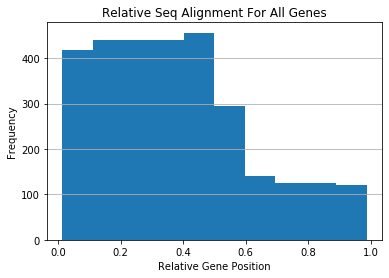

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_40bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_40bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 237
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_40bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


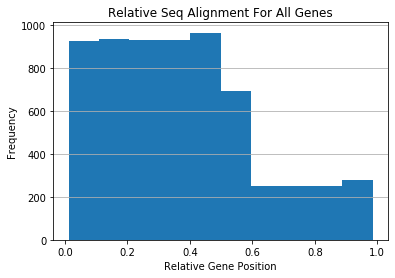

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_41bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_41bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 99
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_41bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


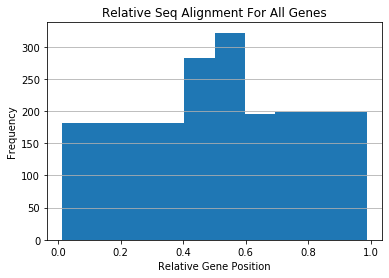

Reading sam file: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_50bp.Pt_51_Mac.sort.sam
File: 180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_50bp.Pt_51_Mac.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 283
Mapped reads, so calculating feature type coverage normalized by feature length
For each position in feature: tRNA, normalize by gene length, record value for histogram
Summary of feature: tRNA, Number of features: 198, Mean length: 73.38
Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/180917_NB501850_A_L1-4_ADPF-30_AdapterTrimmed_R1_50bp.Pt_51_Mac.sort.NormCov.tRNA.pdf


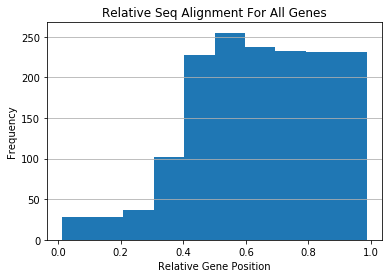

Plotting histogram to outfile: /media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-30_inserts/hisat2/AllNormalizedCoverageHistograms.feature.tRNA.pdf


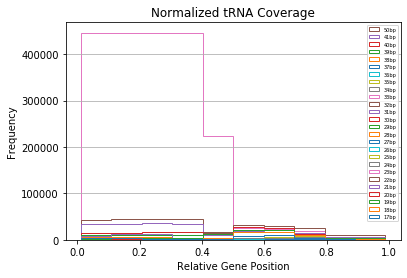

2020-03-09 16:34:52.302196


In [6]:
import os
from pygentoolbox import CalculateRelativeBaseCoverageOfFeatureTypetRNA


#Gff3file = 'D:\\LinuxShare\\Ciliates\\Genomes\\Annotations\\ptetraurelia_mac_51_annotation_v2.0.gff3'  # windows
###Gff3file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/ptetraurelia_mac_51_annotation_v2.0.gff3'  # oracle VM
###filelist = ['180917_NB501850_A_L1-4_ADPF-29_AdapterTrimmed_R1_33bp.Pt_51_Mac.sort.sam']
###directory = '/media/sf_LinuxShare/Projects/Ryuma/hisat2/2018-09-19_L1-4_ADPF-29_inserts/hisat2'
###target_feature = 'tRNA'
###numbins = 10

# collect sorted sam files generated in the previous step:
#samfileextension = '.sort.sam'
samfilelist = []
for file in os.listdir(mappeddirectory):
    if file.endswith(samfileextension):
        samfilelist.append(os.path.join(mappeddirectory, file))

#samfilelist = []
#for f in filelist:
#    samfilelist.append(os.path.join(directory, f))

# collect sorted sam files generated in the previous step:
#samfileextension = '.sort.sam'
samfilelist = []
for file in os.listdir(mappeddirectory):
    if file.endswith(samfileextension):
        samfilelist.append(os.path.join(mappeddirectory, file))

# plots histograms of all relative positions for all features of a feature type
# relative position for each gene (1st position = 1/len(gene), 5th = 5/len(gene))
# i.e. normalizes each position in feature by gene length

CalculateRelativeBaseCoverageOfFeatureTypetRNA.main(Gff3file, samfilelist, target_feature, numbins)
print(datetime.datetime.now())